In [175]:
# Timestamp,Response,IOType,LUN,Offset,Size

#   - Timestamp is the time the I/O was issued.
#     The timestamp is given as a Unix time (seconds since 1/1/1970) with a fractional part. 
#     Although the fractional part is nine digits, it is accurate only to the microsecond level; 
#     please  ignore the nanosecond part.  
#     If you need to process the timestamps in their original local timezone, it is UTC+0900 (JST).
#     For example:
#      > head 2016022219-LUN4.csv.gz  ← (Mon, 22 Feb 2016 19:00:00 JST)
#        1456135200.013118000 ← (Mon, 22 Feb 2016 10:00:00 GMT)       
#   - Response is the time needed to complete the I/O.
#   - IOType is "Read(R)", "Write(W)", or ""(blank).
#     The blank indicates that there was no response message.
#   - LUN is the LUN index (0,1,2,3,4, or 5).
#   - Offset is the starting offset of the I/O in bytes from the start of
#     the logical disk.
#   - Size is the transfer size of the I/O request in bytes.










# Disk size = 4.626 TB (from trace data)

In [176]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [177]:
def count_blocks(data):
    block_counter_dict = {}
    for row in data.itertuples():

        # taking block size = 4KB
        block_index = int(row.Offset / 4096)

        # using offset iterate over the next blocks
        next_blocks_count = int(row.Size / 4096)

        # Incrememnt next blocks counter
        for i in range(0, next_blocks_count):

            if (block_index+i in block_counter_dict):
                block_counter_dict[block_index+i] += 1
            else:
                block_counter_dict[block_index+i] = 1
    return block_counter_dict

In [178]:
def ecdf(data, len_block_counter_dict):
    """ Compute ECDF """
#     x = np.sort(data)
    n = len(data)
#     y = np.arange(1, data) / n

    cumsum = 0
    y = []
    for i in range(len(data)):
        cumsum += data[i]
        y.append(round(cumsum/len_block_counter_dict, 3))

    return y

# 7AM VDI Trace (1 hour)

In [182]:
# URL - http://iotta.snia.org/traces/388





# Graph References - MSR Paper - https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4636097


# Starting Time - 2007-02-22 19:55:39.434557
# Ending Time - 2007-03-01 17:22:03.093349




# Make 3 maps, read-only, write-only, both


import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(rc={'figure.figsize':(14,40)})


data = pd.read_csv('2016022207-LUN0.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456095e+09,0.000806,R,0,899056122368,131072
1,1.456095e+09,0.008044,R,0,4256049987072,122880
2,1.456095e+09,0.007571,R,0,3772288305664,58368
3,1.456095e+09,0.004066,R,0,4256050519552,21504
4,1.456095e+09,0.008952,R,0,899056253440,24576


In [183]:
# PART 1 - All Access

block_counter_dict = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict))
print ("Sum of all the block accesses", sum(block_counter_dict.values()))
# print (block_counter_dict)


# for key in sorted(block_counter_dict):
#     print ("%s: %s" % (key, block_counter_dict[key]))

sorted_block_counter_dict = collections.OrderedDict(sorted(block_counter_dict.items()))
# print(sorted_block_counter_dict)

# print(sorted(block_counter_dict.values(), reverse=True))

Number of blocks accessed 215431
Sum of all the block accesses 219757


In [184]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
# print_df = pd.DataFrame(sorted(block_counter_dict.values(), reverse=True))
# print_df.head

In [185]:
df = pd.DataFrame(sorted_block_counter_dict, index=[1])
# df = pd.DataFrame.from_dict(sorted_block_counter_dict.items(), orient='index')
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict, orient='index')

print(sorted_df)

            0
12777493    1
12778083    1
12778084    1
12779095    1
12779096    1
...        ..
1240270208  1
1240270209  1
1240270210  1
1240272588  1
1240272607  1

[215431 rows x 1 columns]


In [186]:
# sorted_df.info(memory_usage='deep')


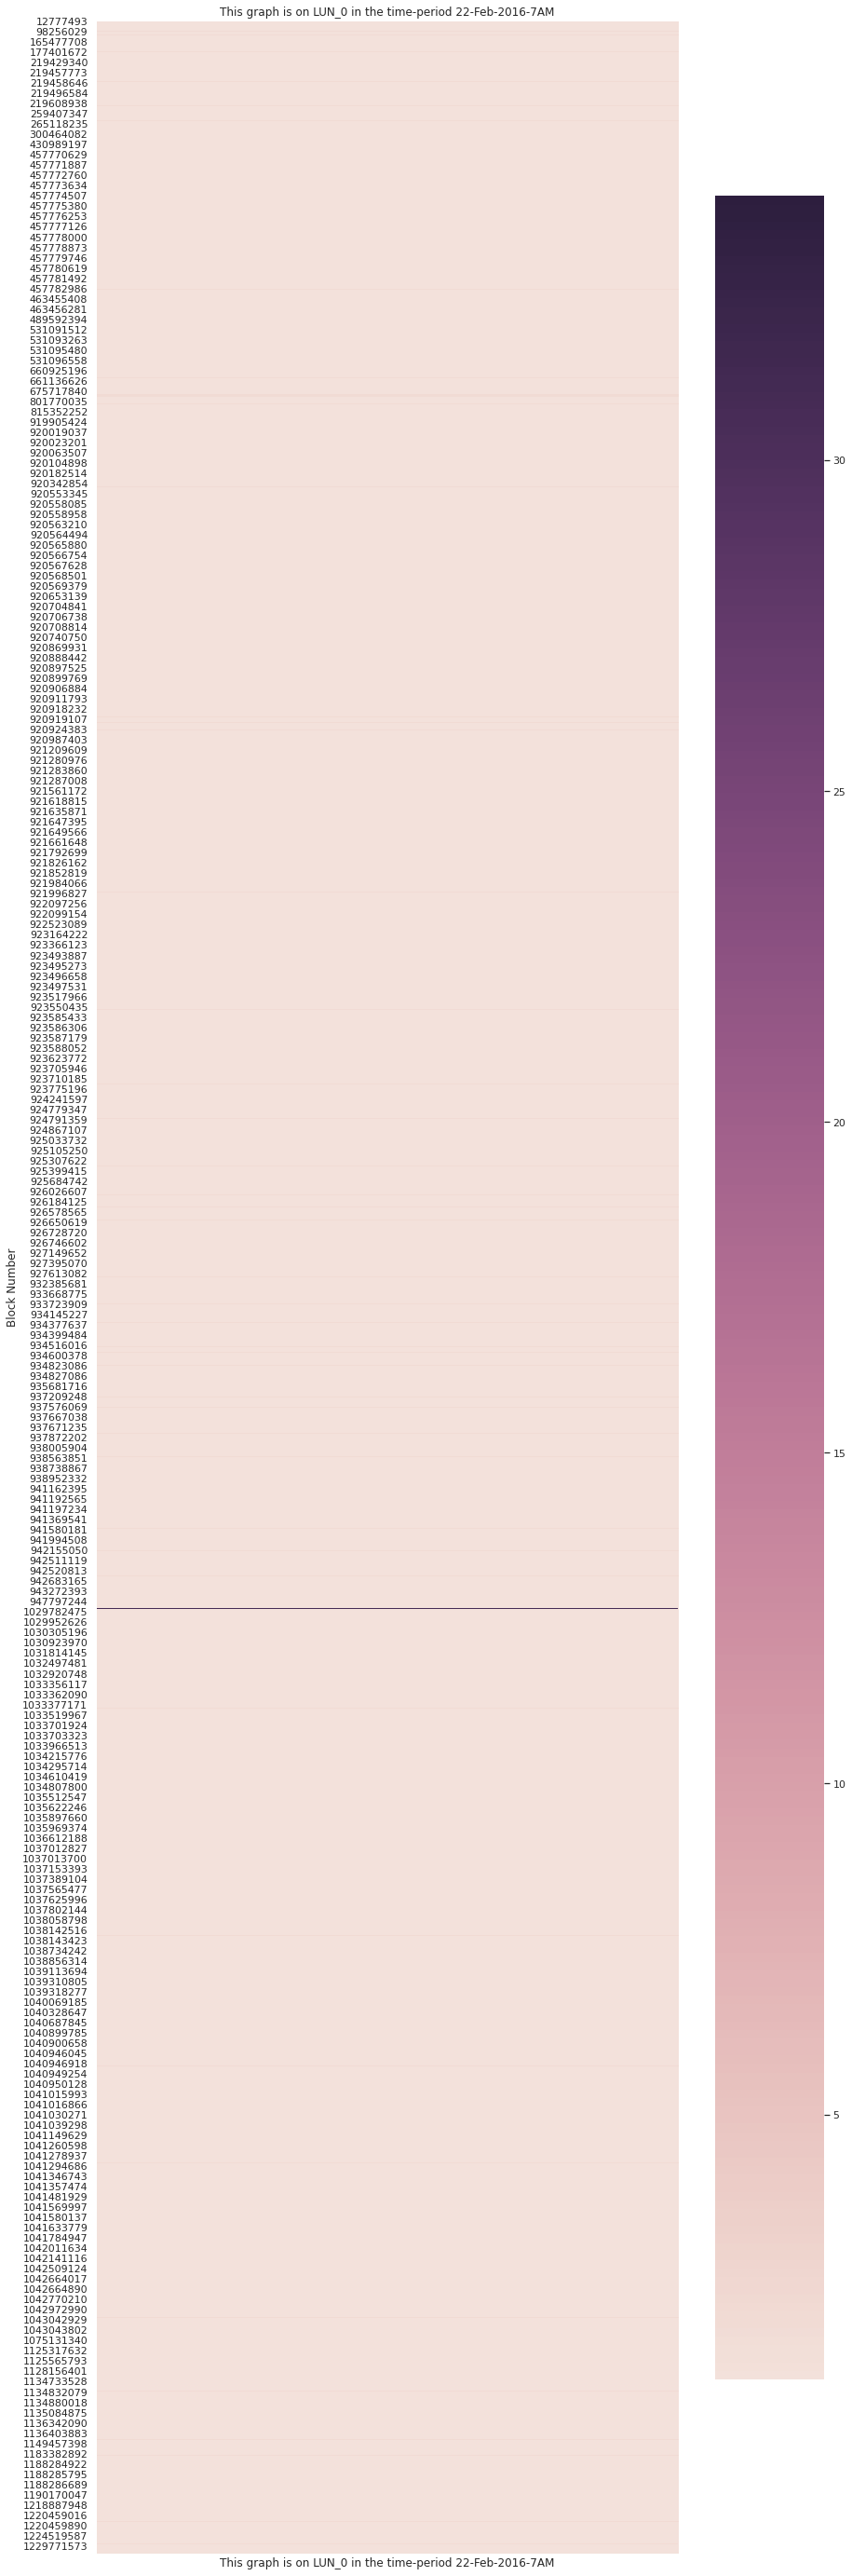

In [8]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-7AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-7AM')
plt.show()


In [9]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

block_range_2000_plus 0
block_range_1000_2000 0
block_range_500_1000 0
block_range_100_500 0
block_range_50_100 0
block_range_10_50 23
block_range_2_10 3547
block_range_1 211861
block_range_0 1240057176


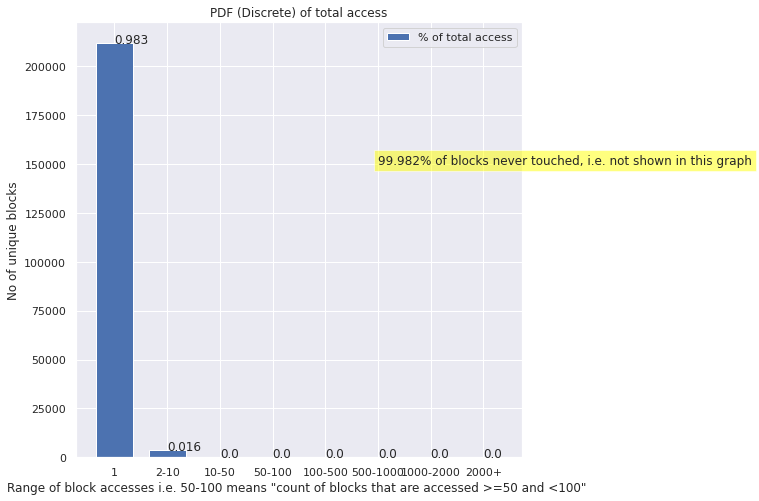

In [14]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 150000, "99.982% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict), 3)), xy=(x_axis[i], y_axis[i]))



Text(4, 0.99, '99.982% of blocks never touched, i.e. not shown in this graph')

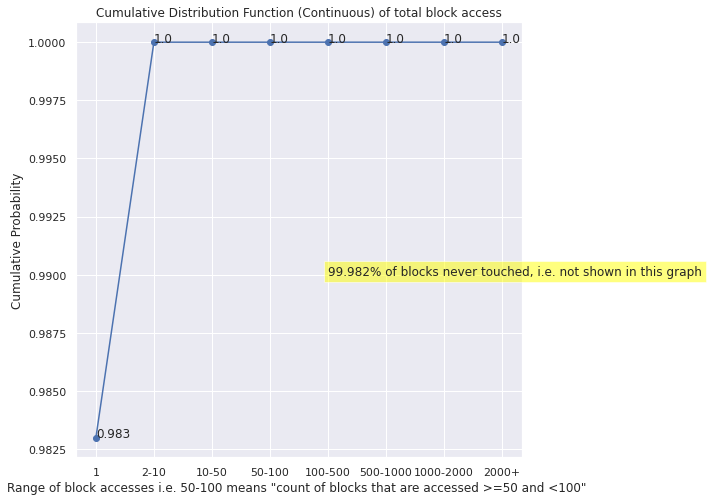

In [18]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis)



########## PLOTLY CODE not visible on github

# trace = go.Scatter(x=x_axis,
#                    y=y,
#                    marker=dict(color='rgb(150, 25, 120)'))


# layout = go.Layout(
#     title="Cumulative Distribution Function"
# )

# fig = go.Figure(data=go.Data([trace]), layout=layout)

# fig.update_layout(
# #     title="Plot Title",
#     xaxis_title="Range of block access",
#     yaxis_title="CDF (continuous)"
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="#7f7f7f"
# #     )
# )
# fig.show()


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.99, "99.982% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))





# 8AM VDI Trace (1 hour)

In [198]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt

data_2 = pd.read_csv('2016022208-LUN0.csv')
data_2.head()

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456096e+09,0.000124,W,0,2649463186432,2048
1,1.456096e+09,0.000247,R,0,4266130934272,4096
2,1.456096e+09,0.000243,R,0,4266130938368,4096
3,1.456096e+09,0.003271,R,0,4156073244160,12288
4,1.456096e+09,0.000840,R,0,3839716067840,131072


In [199]:
block_counter_dict_2 = count_blocks(data_2)
    

print ("Number of blocks accessed", len(block_counter_dict_2))
print ("Sum of all the block accesses", sum(block_counter_dict_2.values()))
# print (block_counter_dict_2)

# for key in sorted(block_counter_dict_2):
#     print ("%s: %s" % (key, block_counter_dict_2[key]))

sorted_block_counter_dict_2 = collections.OrderedDict(sorted(block_counter_dict_2.items()))
# print(sorted_block_counter_dict_2)
# print(sorted(block_counter_dict_2.values(), reverse=True))



Number of blocks accessed 9010532
Sum of all the block accesses 10234535


In [200]:

# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_2.values(), reverse=True))
print_df[:20]

,0
0,3064
1,3062
2,1460
3,1459
4,1423
5,1422
6,1230
7,1230
8,952
9,932


In [201]:
# df = pd.DataFrame(sorted_block_counter_dict_2, index=[1])
sorted_df_2 = pd.DataFrame.from_dict(sorted_block_counter_dict_2, orient='index')

print(sorted_df_2)

            0
33049       1
33053       1
33631       1
33632       1
33633       1
...        ..
1241221276  1
1241221277  1
1241221278  1
1241221279  1
1241221280  1

[9010532 rows x 1 columns]


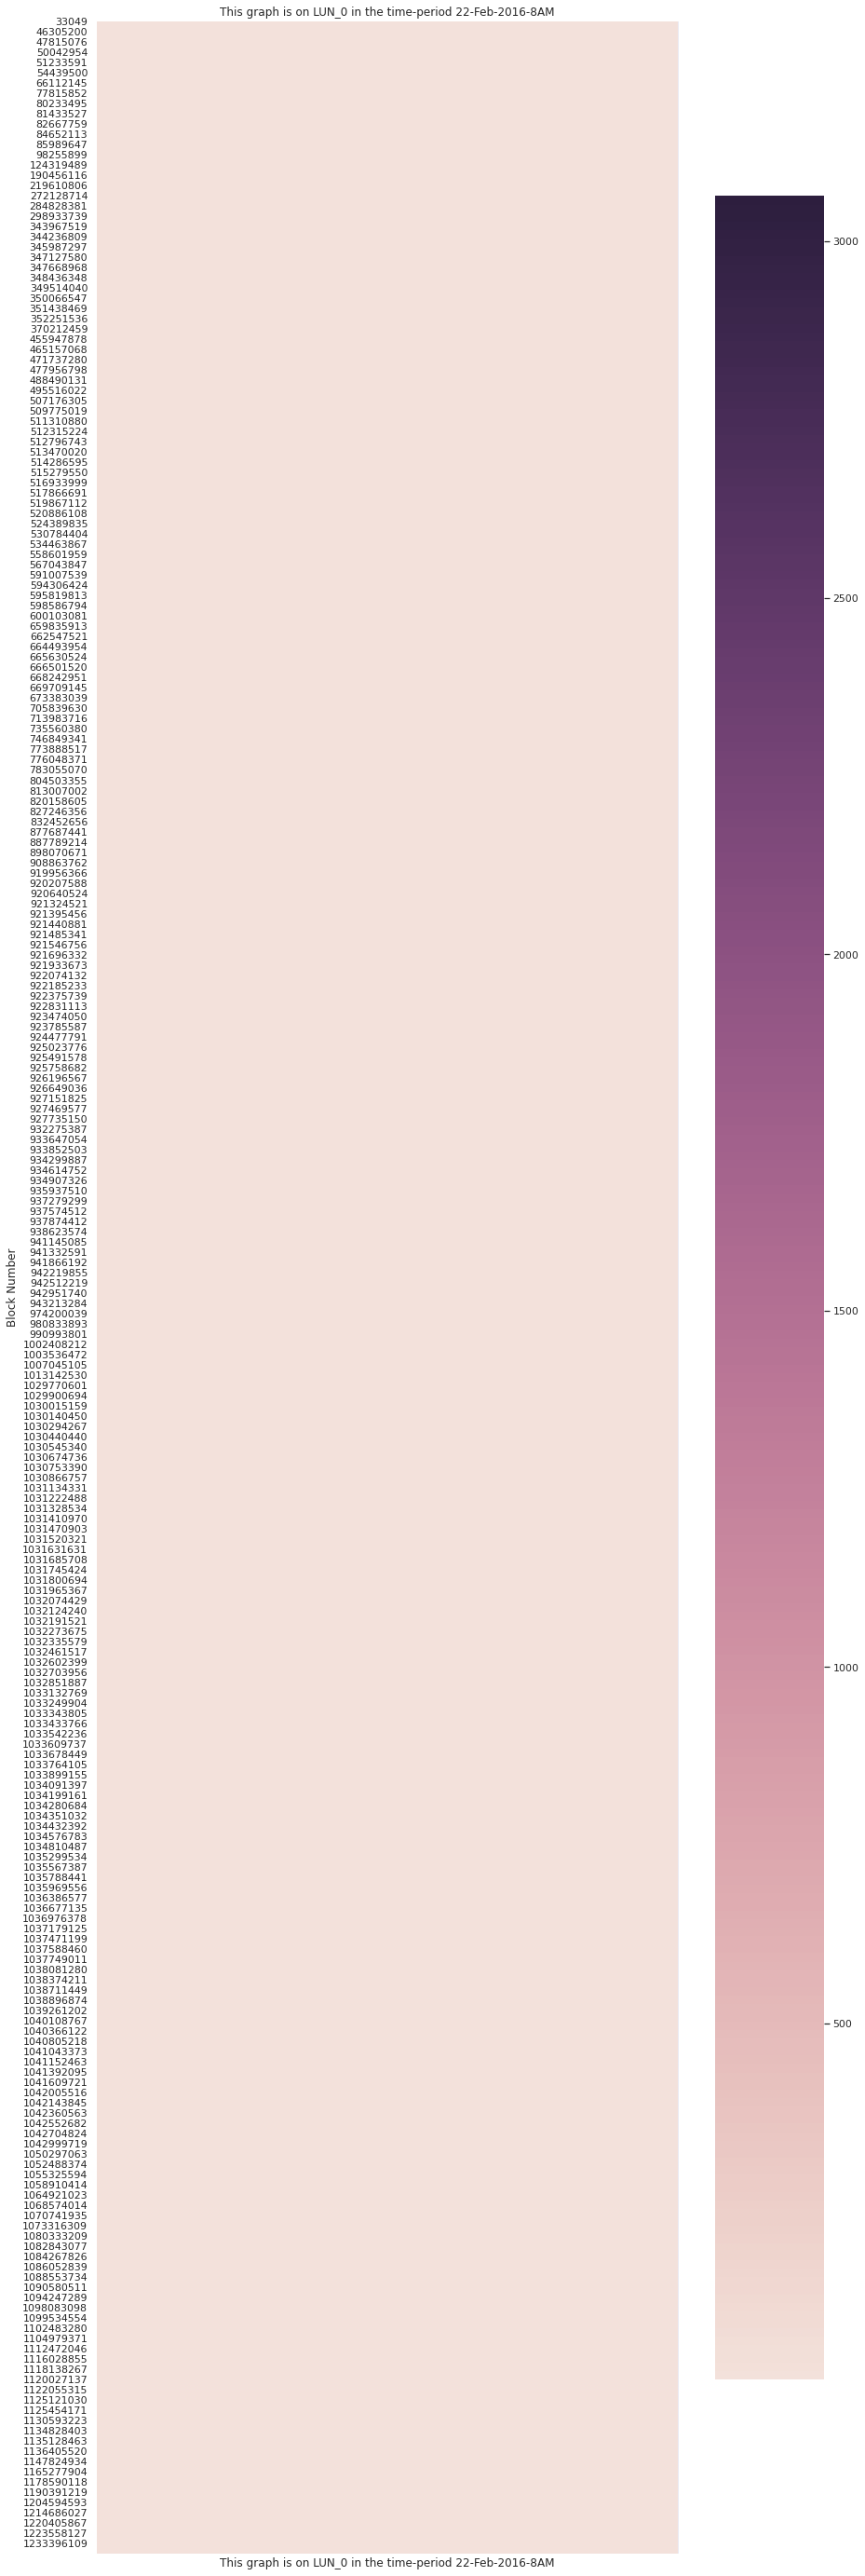

In [13]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df_2, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-8AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-8AM')
plt.show()


In [12]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_2.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_2)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_2)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

# 99.278

block_range_2000_plus 2
block_range_1000_2000 6
block_range_500_1000 40
block_range_100_500 617
block_range_50_100 3229
block_range_10_50 3272
block_range_2_10 619773
block_range_1 8383593
block_range_0 1232210748


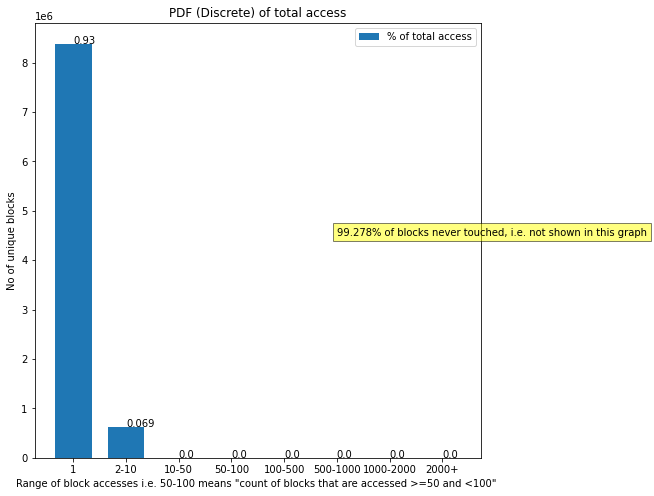

In [13]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "99.278% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_2), 3)), xy=(x_axis[i], y_axis[i]))


Text(4, 0.99, '99.278% of blocks never touched, i.e. not shown in this graph')

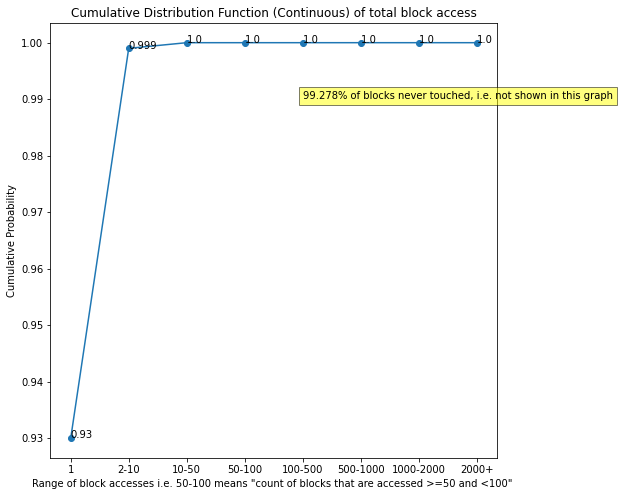

In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_2))



########## PLOTLY CODE not visible on github

# trace = go.Scatter(x=x_axis,
#                    y=y,
#                    marker=dict(color='rgb(150, 25, 120)'))


# layout = go.Layout(
#     title="Cumulative Distribution Function"
# )

# fig = go.Figure(data=go.Data([trace]), layout=layout)

# fig.update_layout(
# #     title="Plot Title",
#     xaxis_title="Range of block access",
#     yaxis_title="CDF (continuous)"
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="#7f7f7f"
# #     )
# )
# fig.show()


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.99, "99.278% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))




# 9AM VDI Trace (1 hour)

In [25]:
# LUN0 for Hour-9

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_3 = pd.read_csv('2016022209-LUN0.csv')
data_3.head()

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456099e+09,0.000239,R,0,140099203072,4096
1,1.456099e+09,0.000196,R,0,140099198976,4096
2,1.456099e+09,0.000173,R,0,140099194880,4096
3,1.456099e+09,0.007073,R,0,3614119882752,3072
4,1.456099e+09,0.007911,R,0,4386442131456,4096


In [26]:
block_counter_dict_3 = count_blocks(data_3)
    

print ("Number of blocks accessed", len(block_counter_dict_3))
print ("Sum of all the block accesses", sum(block_counter_dict_3.values()))
# print (block_counter_dict_3)

# for key in sorted(block_counter_dict_3):
#     print ("%s: %s" % (key, block_counter_dict_3[key]))

sorted_block_counter_dict_3 = collections.OrderedDict(sorted(block_counter_dict_3.items()))
# print(sorted_block_counter_dict_3)
# print(sorted(block_counter_dict_3.values(), reverse=True))



Number of blocks accessed 16796116
Sum of all the block accesses 23876654


In [46]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_3.values(), reverse=True))
print_df[:20]

,0
0,3088
1,3088
2,2971
3,2971
4,2313
5,2313
6,1908
7,1907
8,1626
9,1625


In [47]:
# df = pd.DataFrame(sorted_block_counter_dict_3, index=[1])
sorted_df_3 = pd.DataFrame.from_dict(sorted_block_counter_dict_3, orient='index')

print(sorted_df_3)

            0
33049       4
33120       1
33121       1
33122       1
33123       1
...        ..
1241814803  1
1241814804  1
1241814805  1
1241814806  1
1241818556  1

[16796116 rows x 1 columns]


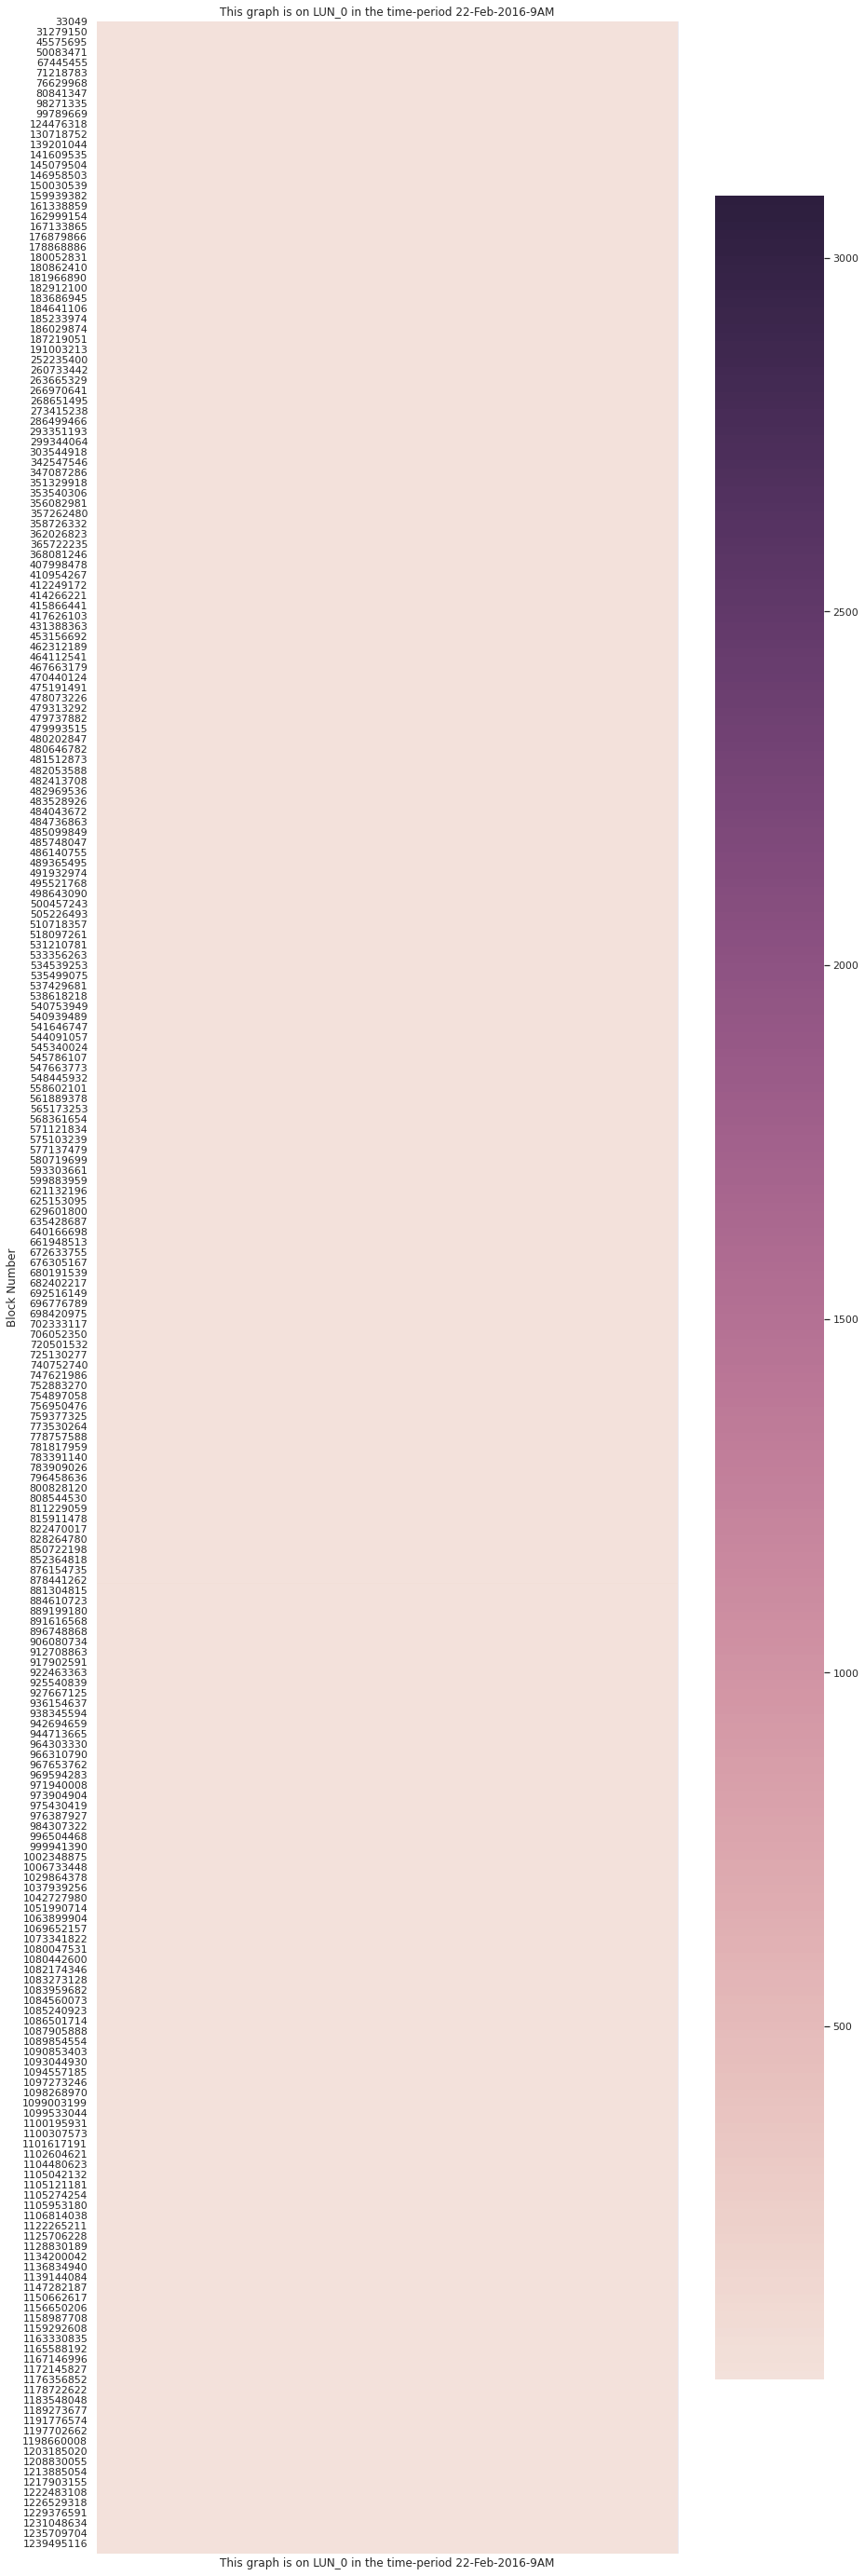

In [7]:
sns.set(rc={'figure.figsize':(14,50)})
cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df_3, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-9AM')
plt.show()

In [27]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_3.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_3)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_3)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

# 98.647

block_range_2000_plus 6
block_range_1000_2000 16
block_range_500_1000 34
block_range_100_500 1354
block_range_50_100 3764
block_range_10_50 20686
block_range_2_10 4327155
block_range_1 12443101
block_range_0 1225022440


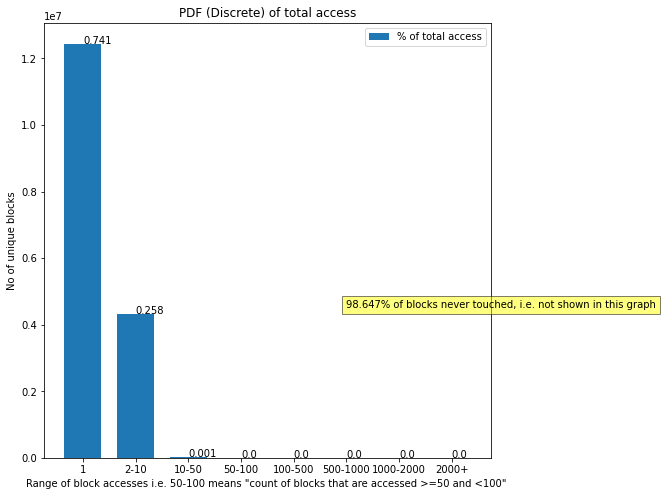

In [31]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.647% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_3), 3)), xy=(x_axis[i], y_axis[i]))


Text(4, 0.9, '98.647% of blocks never touched, i.e. not shown in this graph')

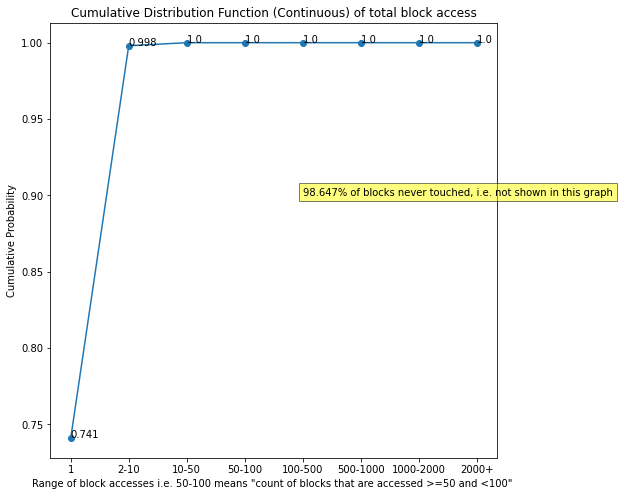

In [30]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_3))



########## PLOTLY CODE not visible on github

# trace = go.Scatter(x=x_axis,
#                    y=y,
#                    marker=dict(color='rgb(150, 25, 120)'))


# layout = go.Layout(
#     title="Cumulative Distribution Function"
# )

# fig = go.Figure(data=go.Data([trace]), layout=layout)

# fig.update_layout(
# #     title="Plot Title",
#     xaxis_title="Range of block access",
#     yaxis_title="CDF (continuous)"
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="#7f7f7f"
# #     )
# )
# fig.show()


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.647% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))




# 10AM VDI Trace (1 hour)

In [35]:
# LUN0 for Hour-9

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_4 = pd.read_csv('2016022210-LUN0.csv')
data_4[:20]

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456103e+09,0.000481,W,0,757279331840,131072
1,1.456103e+09,0.000676,W,0,757279462912,131072
2,1.456103e+09,0.000822,W,0,757279593984,131072
3,1.456103e+09,0.000822,W,0,757279725056,72704
4,1.456103e+09,0.001025,W,0,768725214720,131072
5,1.456103e+09,0.001082,W,0,768725345792,53248
6,1.456103e+09,0.001140,W,0,768725399552,77824
7,1.456103e+09,0.001515,W,0,768725477376,131072
8,1.456103e+09,0.001434,W,0,768725608448,89600
9,1.456103e+09,0.001879,W,0,759526110208,131072


In [36]:
block_counter_dict_4 = count_blocks(data_4)
    

print ("Number of blocks accessed", len(block_counter_dict_4))
print ("Sum of all the block accesses", sum(block_counter_dict_4.values()))
# print (block_counter_dict_4)

# for key in sorted(block_counter_dict_4):
#     print ("%s: %s" % (key, block_counter_dict_4[key]))

sorted_block_counter_dict_4 = collections.OrderedDict(sorted(block_counter_dict_4.items()))
# print(sorted_block_counter_dict_4)
# print(sorted(block_counter_dict_4.values(), reverse=True))



Number of blocks accessed 9293643
Sum of all the block accesses 12682161


In [37]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_4.values(), reverse=True))
print_df[:20]

,0
0,4020
1,4017
2,3032
3,3032
4,1887
5,1886
6,1683
7,1682
8,1622
9,1622


In [40]:
# df = pd.DataFrame(sorted_block_counter_dict_4, index=[1])
sorted_df_4 = pd.DataFrame.from_dict(sorted_block_counter_dict_4, orient='index')

print(sorted_df_4)

             0
33049       12
33050        1
33051        1
33052        1
33053        1
...         ..
1241788986   1
1241788987   1
1241788988   1
1241788989   1
1241788990   1

[9293643 rows x 1 columns]


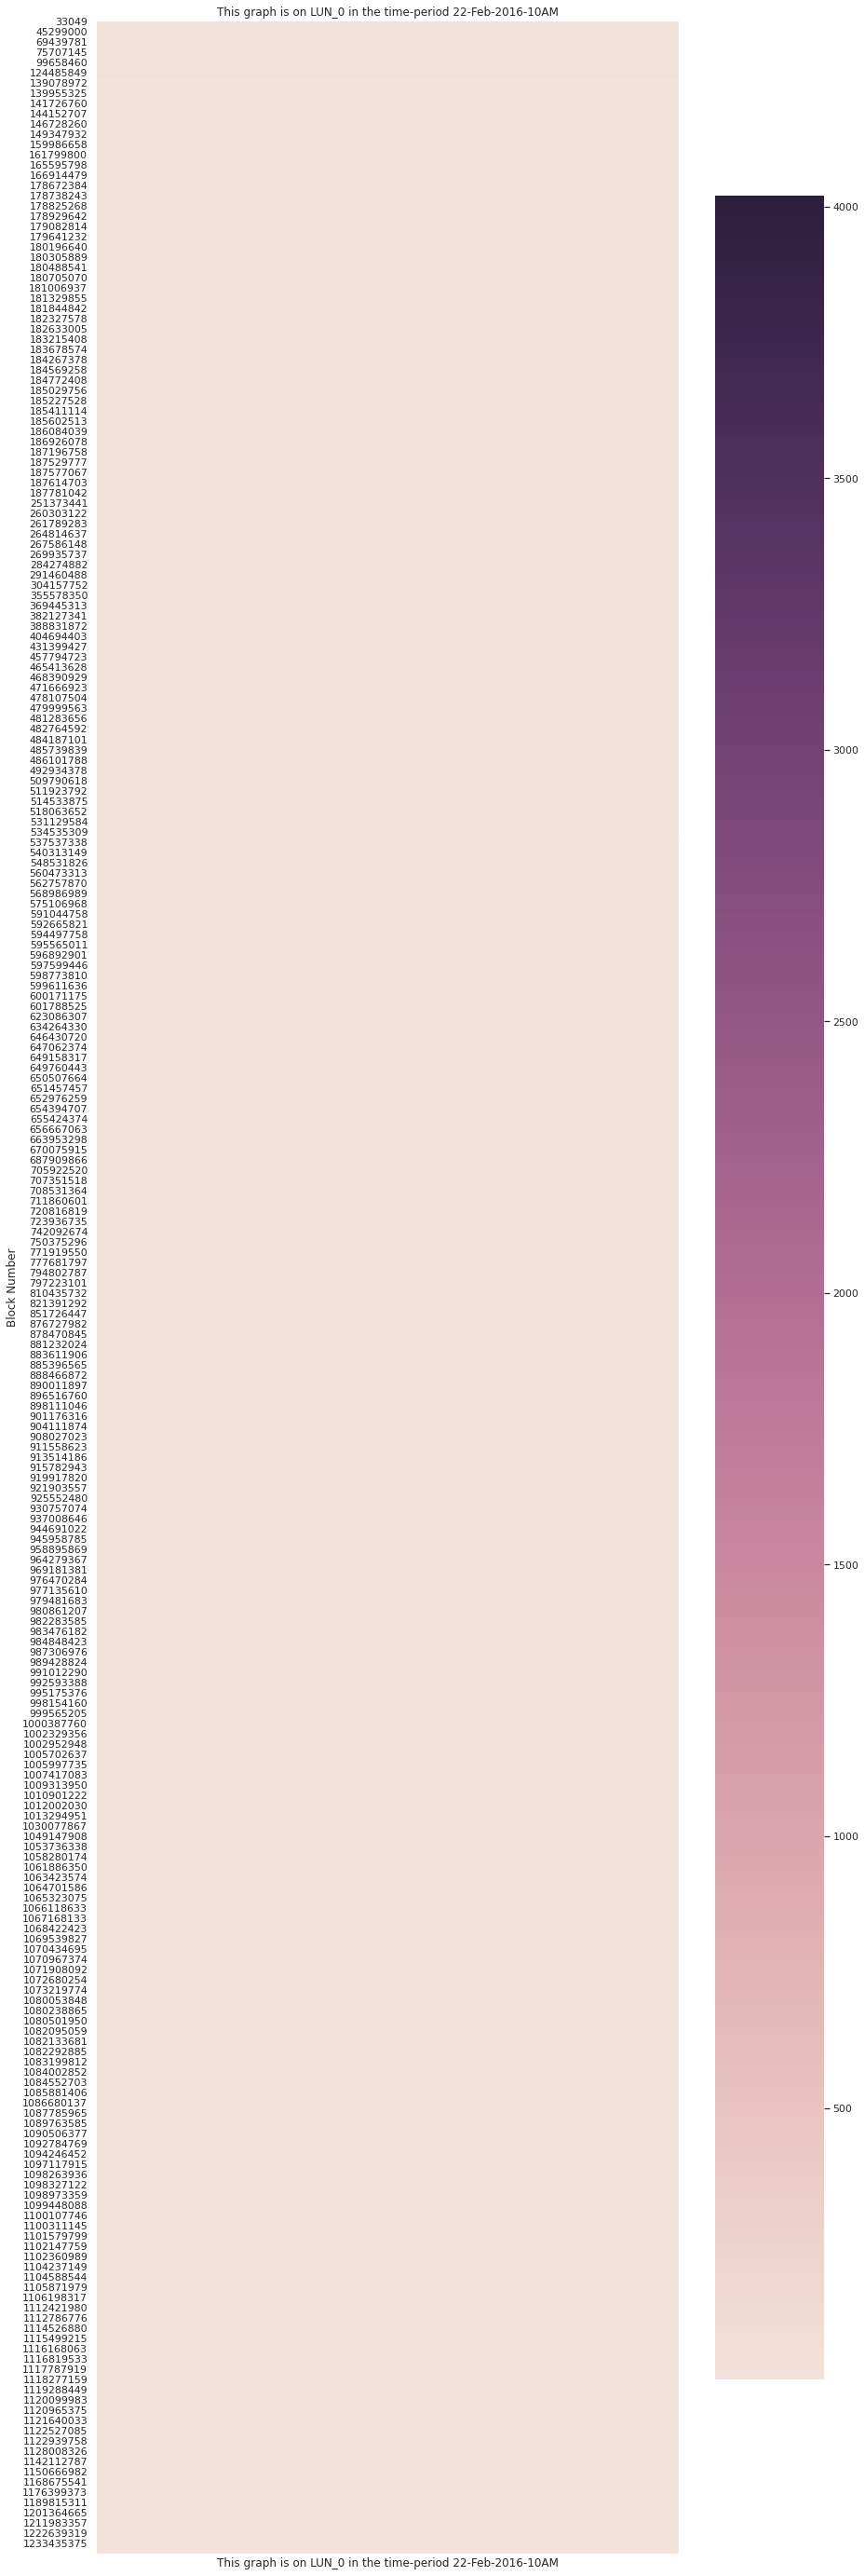

In [13]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)
# cmap_i.set_under("0.5")

heatmap = sns.heatmap(sorted_df_4, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-10AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-10AM')
plt.show()

In [39]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_4.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_4)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_4)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

# 98.647





block_range_2000_plus 4
block_range_1000_2000 16
block_range_500_1000 29
block_range_100_500 1082
block_range_50_100 3606
block_range_10_50 14974
block_range_2_10 1628524
block_range_1 7645408
block_range_0 1232495347


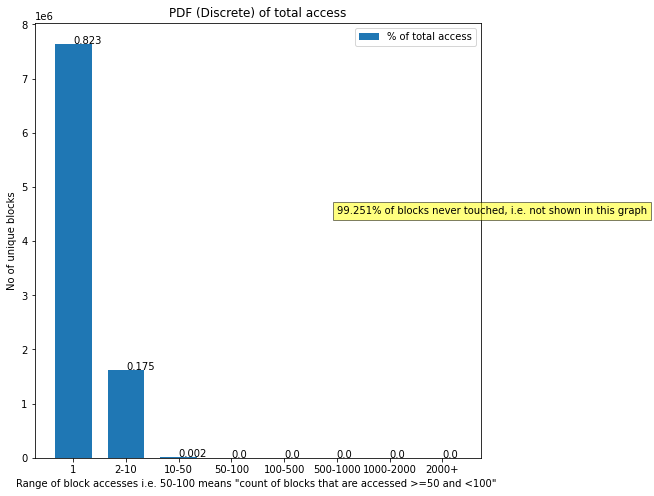

In [40]:


import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "99.251% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_4), 3)), xy=(x_axis[i], y_axis[i]))





Text(4, 0.9, '99.251% of blocks never touched, i.e. not shown in this graph')

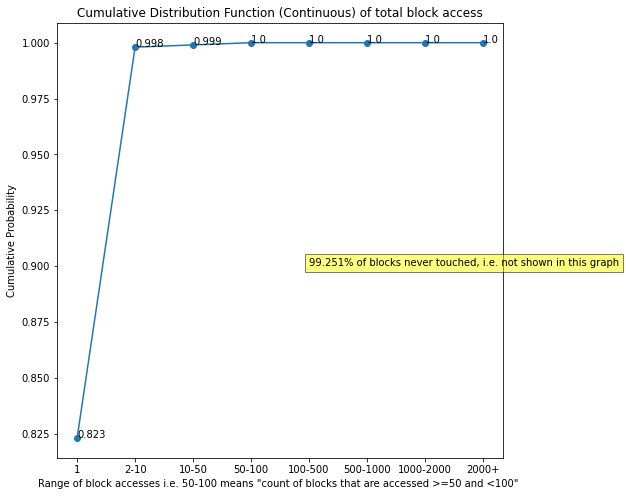

In [41]:

import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_4))



########## PLOTLY CODE not visible on github

# trace = go.Scatter(x=x_axis,
#                    y=y,
#                    marker=dict(color='rgb(150, 25, 120)'))


# layout = go.Layout(
#     title="Cumulative Distribution Function"
# )

# fig = go.Figure(data=go.Data([trace]), layout=layout)

# fig.update_layout(
# #     title="Plot Title",
#     xaxis_title="Range of block access",
#     yaxis_title="CDF (continuous)"
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="#7f7f7f"
# #     )
# )
# fig.show()


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "99.251% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 11AM VDI Trace (1 hour)

In [45]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_5 = pd.read_csv('2016022211-LUN0.csv')
data_5[:20]

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456106e+09,0.000314,R,0,4095586441216,12288
1,1.456106e+09,0.002547,R,0,4095586494464,4096
2,1.456106e+09,0.002563,R,0,4095586715648,4096
3,1.456106e+09,0.003386,R,0,4105547817472,4096
4,1.456106e+09,0.003476,R,0,4105547833856,4096
5,1.456106e+09,0.003628,R,0,4091661445632,4096
6,1.456106e+09,0.000207,R,0,2335042985472,4096
7,1.456106e+09,0.006435,R,0,4024212915712,4096
8,1.456106e+09,0.007042,R,0,4095565980672,4096
9,1.456106e+09,0.007184,R,0,4095566001152,4096


In [46]:
block_counter_dict_5 = count_blocks(data_5)
    

print ("Number of blocks accessed", len(block_counter_dict_5))
print ("Sum of all the block accesses", sum(block_counter_dict_5.values()))
# print (block_counter_dict_5)

# for key in sorted(block_counter_dict_5):
#     print ("%s: %s" % (key, block_counter_dict_5[key]))

sorted_block_counter_dict_5 = collections.OrderedDict(sorted(block_counter_dict_5.items()))
# print(sorted_block_counter_dict_5)
# print(sorted(block_counter_dict_5.values(), reverse=True))



Number of blocks accessed 8666787
Sum of all the block accesses 10678957


In [56]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_5.values(), reverse=True))
print_df[:20]

,0
0,3135
1,3135
2,1734
3,1734
4,1466
5,1466
6,1439
7,1438
8,1412
9,1411


In [57]:
# df = pd.DataFrame(sorted_block_counter_dict_4, index=[1])
sorted_df_5 = pd.DataFrame.from_dict(sorted_block_counter_dict_5, orient='index')

print(sorted_df_5)

            0
33049       3
33120       2
33121       2
33122       2
33123       2
...        ..
1241674634  1
1241674635  1
1241674636  1
1241674637  1
1241792003  2

[8666787 rows x 1 columns]


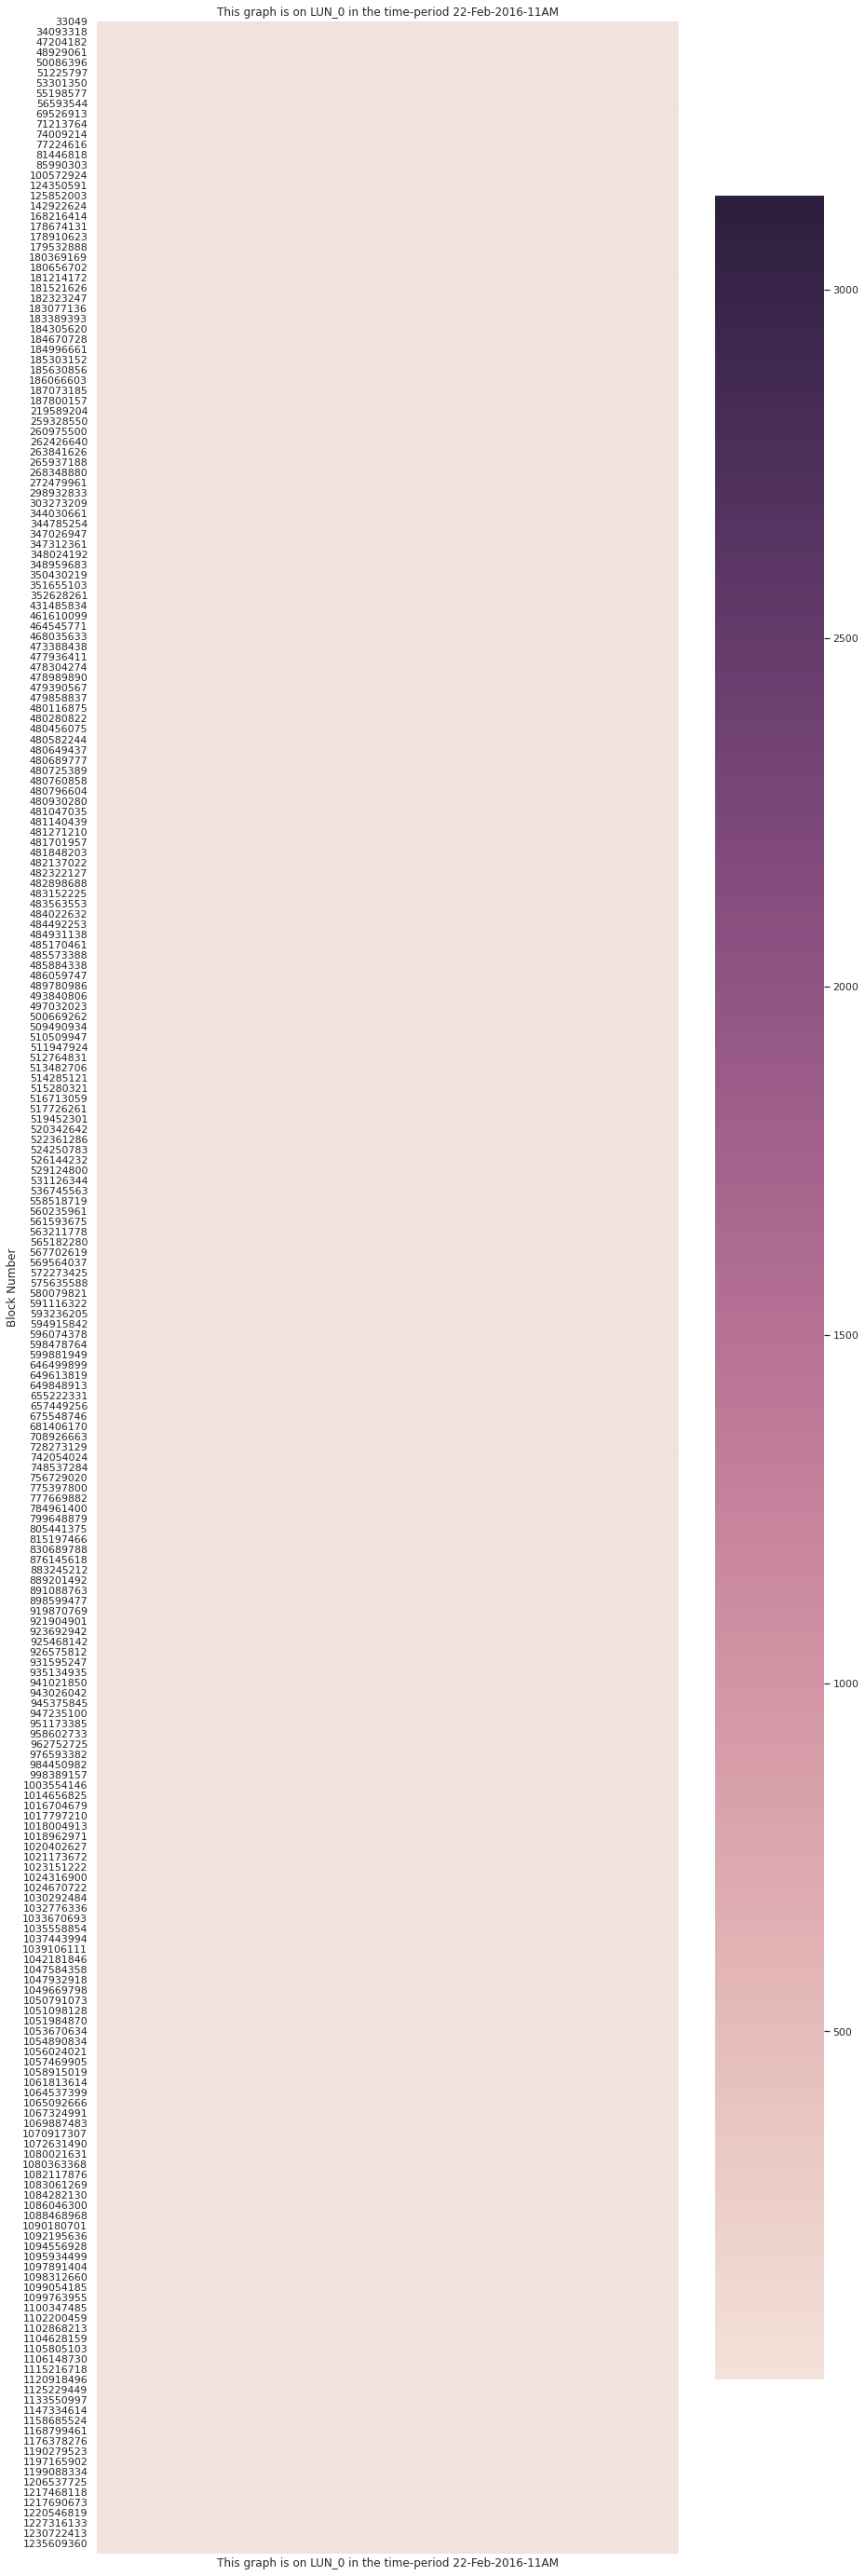

In [12]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)
# cmap_i.set_under("0.5")

heatmap = sns.heatmap(sorted_df_5, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-11AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-11AM')
plt.show()

In [49]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_5.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_5)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_5)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

# 99.302





block_range_2000_plus 2
block_range_1000_2000 16
block_range_500_1000 28
block_range_100_500 857
block_range_50_100 3505
block_range_10_50 8932
block_range_2_10 1107829
block_range_1 7545618
block_range_0 1233125216


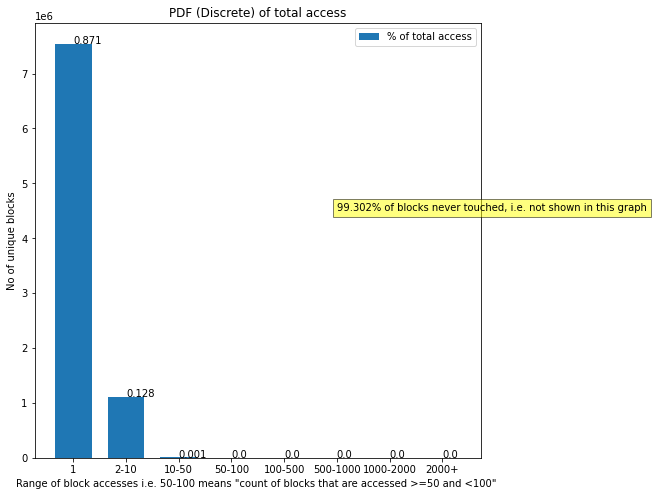

In [50]:


import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "99.302% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_5), 3)), xy=(x_axis[i], y_axis[i]))





Text(4, 0.9, '99.302% of blocks never touched, i.e. not shown in this graph')

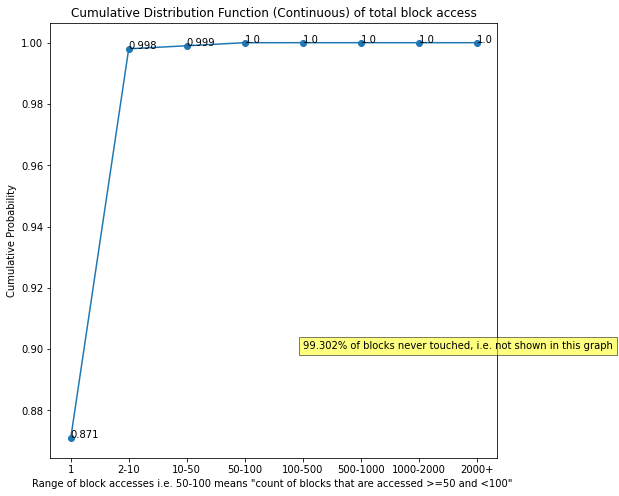

In [51]:

import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_5))



########## PLOTLY CODE not visible on github

# trace = go.Scatter(x=x_axis,
#                    y=y,
#                    marker=dict(color='rgb(150, 25, 120)'))


# layout = go.Layout(
#     title="Cumulative Distribution Function"
# )

# fig = go.Figure(data=go.Data([trace]), layout=layout)

# fig.update_layout(
# #     title="Plot Title",
#     xaxis_title="Range of block access",
#     yaxis_title="CDF (continuous)"
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="#7f7f7f"
# #     )
# )
# fig.show()


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "99.302% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# Distribution Function

In [ ]:
from collections import OrderedDict 




# x = sorted_df[-1:]
# print(type(x), x)
# print(type())
# print(sorted_df_4.tail(1).index.item())
# print(sorted_df_3.tail(1).index.item())
# print(max(sorted_df_3.tail(1).index.item(),
#          sorted_df_4.tail(1).index.item()))
# 1241818556

# print(sorted_df_5.tail(1).index.item())
# print (max(sorted_df_5.tail(1).index.item(), 1241818556 ))


max_block_index = 1241818556
all_block_count = OrderedDict.fromkeys(range(max_block_index + 1), 0)
len(all_block_count)

# Extra Code (Reference purpose - No use)

In [ ]:
# Part 2 - This is time series data



# Reset all the values to zero
# new_block_dict = dict.fromkeys(sorted_block_counter_dict, 0)

result_df = pd.DataFrame()

granularity_y_axis = 1000
granularity_x_axis = 20

time_series_dict = dict.fromkeys(range(granularity_y_axis+1), 0)
flag = False
dataframe_column_count = 0

# Now keep only granularity_y_axis block_ranges on y-axis for better visualisation
block_range_size = sorted_df.index[-1] // granularity_y_axis









for i in range(0,3):
    result_df[i]





for row in data.itertuples():
    
    # print (type(convert_filetime_to_datetime(row.Timestamp)), convert_filetime_to_datetime(row.Timestamp))
    

    
    # Time visualisation can be seen in above print statement - Collect trace map for every 12hrs
    current_io_time = convert_filetime_to_datetime(row.Timestamp)
    if abs(current_io_time - set_pivot_timer) > timedelta(hours=set_hours):
        # 6 hours limit crossed, set a flag and record new entries
        flag = True
        df = pd.DataFrame.from_dict(time_series_dict, orient='index')
        result_df[dataframe_column_count] = df[0].values
        
        # update pivot timer to current one
        set_pivot_timer = current_io_time
        print ("set_pivot_timer", set_pivot_timer)
        
        dataframe_column_count += 1
        
        
        
        
        
    # Reintialize dict if just copied to dataframe    
    if flag == True:
        time_series_dict = dict.fromkeys(range(granularity_y_axis + 1), 0)
        flag = False
    
    
    
    
    
    # taking block size = 4KB    
    block_index = row.Offset // 4096
    # using offset iterate over the next blocks
    next_blocks_count = row.Size // 4096

    
    
    
    # Increment next blocks counter -------
    for i in range(0, next_blocks_count):
        time_series_dict[(block_index+i) // block_range_size] += 1
        
        
        
        
#     flag = False
    # No of time periods defined here
    if dataframe_column_count > granularity_x_axis:
        break

        
        
# loop ended, copy last time period data
if flag == False and dataframe_column_count <= granularity_x_axis:
    df = pd.DataFrame.from_dict(time_series_dict, orient='index')
    result_df[dataframe_column_count] = df[0].values
        
print (result_df)

In [ ]:
# Convert to localtime of the VDI, i.e. GMT + 9hours

def convert_unixtime_to_datetime(ft):
#     return (datetime.utcfromtimestamp(ft) + timedelta(hours=9)).strftime('%Y-%m-%d %H:%M:%S:%f')
    return (datetime.utcfromtimestamp(ft) + timedelta(hours=9)).strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
heatmap = sns.heatmap(result_df, cmap="YlGnBu")
plt.xlabel('Time periods (each period of %s hour(s)' % set_hours)
plt.ylabel('Block Range, each index is a collection = %d blocks, some indexes will be visible on increasing figure size in line#1' % block_range_size)

plt.title('This graph shows time-series data, i.e. temperature of block(s) over a period of time')
plt.show()


In [ ]:
print("Start time - ", convert_filetime_to_datetime(data.Timestamp[0]))
print("End time - ", convert_filetime_to_datetime(data.Timestamp[2244643]))
print(len(block_counter_dict) // 100)


In [ ]:
sorted_df.index[-1]

# Extra Code - Dataframe JSON

In [196]:
import pandas as pd
all_blocks_all_times_df = pd.DataFrame()






# copy data to json
def df_to_json(df):
    df.to_json (r'export_sorted_df.json', orient='columns')

    
    
    
    
    
    
    
import pandas as pd
import json

def json_to_df():
    file = 'export_sorted_df.json'
    
    # load to dict then df, for maintaining order
    with open(file) as json_file:
        dict_json = json.load(json_file)



    # for k,v in dict_train.items()[:5]:
    #     print (k,v)

    # print(len(dict_train))
    # print(dict_train.shape())
    # # converting json dataset from dictionary to dataframe
    # train = pd.DataFrame.from_dict(dict_train, key=dict_train.columns())
    ret_df = pd.DataFrame.from_dict(dict_json, orient='index')
    # train.reset_index(level=0, inplace=True)
    return ret_df


In [187]:
import pandas as pd
# all_blocks_all_times_df = json_to_df()

# print(all_blocks_all_times_df)

for index, row in sorted_df.iterrows():
#     print(index, row[0])
    if index in all_blocks_all_times_df.index:
        all_blocks_all_times_df.loc[index, '0'] += sorted_df.loc[index, '0'] 
    else:
        all_blocks_all_times_df = all_blocks_all_times_df.append(sorted_df.loc[index])
        
    
# if '12777493' in train.index:
#     print ("HOLAA")
#     print(train.loc['12777493', '1'])
#     train.loc['12777493', '1'] = train.loc['12777493', '1'] + 5
#     print(train.loc['12777493', '1'])
    

In [190]:
all_blocks_all_times_df

,12777493,12778083,12778084,12779095,12779096,12779097,12779098,12779099,12779100,12779101,...,1240270203,1240270204,1240270205,1240270206,1240270207,1240270208,1240270209,1240270210,1240272588,1240272607
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [195]:
df_to_json(all_blocks_all_times_df)


In [197]:
all_blocks_all_times_df = json_to_df()

print(all_blocks_all_times_df)

              0
1002647776  1.0
1002647777  1.0
1002647778  1.0
1002647779  1.0
1002647780  1.0
...         ...
998827526   1.0
998827530   1.0
998827531   1.0
998827532   1.0
998827534   1.0

[215431 rows x 1 columns]


In [ ]:
# Dictionary needs to load complete object at once, datframe loads apriori

In [7]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sorted_df)

In [204]:
import pandas as pd
# all_blocks_all_times_df = json_to_df()

# print(all_blocks_all_times_df)

for index, row in sorted_df_2.iterrows():
#     print(index, row[0])
    if index in all_blocks_all_times_df.index:
        all_blocks_all_times_df.loc[index, '0'] += sorted_df_2.loc[index, '0'] 
    else:
        all_blocks_all_times_df = all_blocks_all_times_df.append(sorted_df_2.loc[index])
        


KeyboardInterrupt: 

In [205]:
print(all_blocks_all_times_df)


              0    0
1002647776  1.0  NaN
1002647777  1.0  NaN
1002647778  1.0  NaN
1002647779  1.0  NaN
1002647780  1.0  NaN
...         ...  ...
81447816    NaN  2.0
81447817    NaN  2.0
81447818    NaN  2.0
81447819    NaN  2.0
81447820    NaN  2.0

[552899 rows x 2 columns]
